## GDP AND INTERNET USE

## 3.Import the required packages with their customary aliases as follows:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


### 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [8]:
gdp_df.shape

(7662, 4)

## 4 Columns and 7,662 Rows

In [10]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [11]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


## What are the data types of each column?
## object, int and float

## 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [14]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [15]:
gdp_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'GDP_Per_Cap'})

,Country,Year,GDP_Per_Cap
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [16]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'})

In [17]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


## 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [18]:
gdp_df.Year.value_counts()

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

In [19]:
gdp_df.isnull().sum()

Country           0
Year              0
GDP_Per_Capita    0
dtype: int64

In [20]:
gdp_df.Country.value_counts()

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

In [21]:
gdp_df_f = gdp_df.Country.value_counts().to_frame()

In [22]:
gdp_df_f.value_counts()

count
33       202
28        10
32         5
23         4
31         3
22         3
29         2
26         2
10         2
12         1
25         1
20         1
19         1
16         1
30         1
15         1
14         1
24         1
Name: count, dtype: int64

In [23]:
gdp_df_f = gdp_df_f.reset_index()

In [24]:
gdp_df_f

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [25]:
missing_years = gdp_df_f.loc[gdp_df_f['count'] < 33]

In [26]:
gdp_df_f.loc[gdp_df_f['count'] < 33]

,Country,count
202,Hungary,32
203,Lebanon,32
204,Aruba,32
205,Tonga,32
206,Bhutan,32
207,Slovak Republic,31
208,Kuwait,31
209,Turkmenistan,31
210,Cambodia,30
211,West Bank and Gaza,29


In [27]:
missing_years.reset_index()

,index,Country,count
0,202,Hungary,32
1,203,Lebanon,32
2,204,Aruba,32
3,205,Tonga,32
4,206,Bhutan,32
5,207,Slovak Republic,31
6,208,Kuwait,31
7,209,Turkmenistan,31
8,210,Cambodia,30
9,211,West Bank and Gaza,29


In [28]:
not_missing_years = gdp_df_f.loc[gdp_df_f['count'] == 33]

In [29]:
not_missing_years

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
197,Finland,33
198,Europe & Central Asia (excluding high income),33
199,Ghana,33
200,Euro area,33


## 33 Countries have data for all years. 39 Countries do not show data for all years. The observations seem to have more each year until the most recent years where there is a dropoff.

## 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [30]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [31]:
gdp_df.loc[gdp_df.Year == 2020]


,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [32]:
gdp_df_2020 = gdp_df.loc[gdp_df.Year == 2020]

In [33]:
gdp_df_2020.reset_index()

,index,Country,Year,GDP_Per_Capita
0,1,Afghanistan,2020,1968.341002
1,22,Africa Eastern and Southern,2020,3455.023119
2,55,Africa Western and Central,2020,3957.933804
3,88,Albania,2020,13278.369769
4,121,Algeria,2020,10844.770764
...,...,...,...,...
237,7503,Viet Nam,2020,10450.622382
238,7536,West Bank and Gaza,2020,5402.538773
239,7565,World,2020,16204.169107
240,7598,Zambia,2020,3183.650773


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

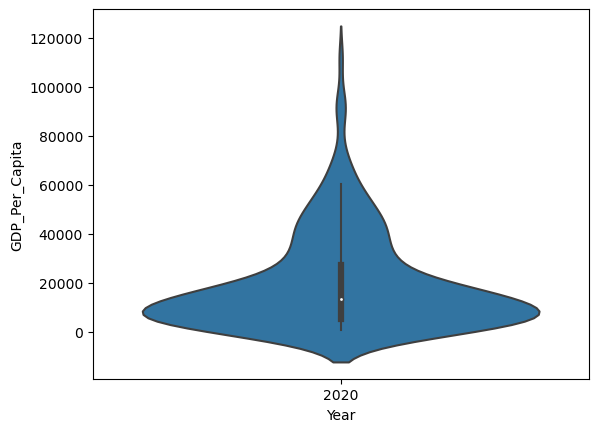

In [34]:
sns.violinplot(x=gdp_df_2020['Year'], y=gdp_df_2020['GDP_Per_Capita'])

C:\Users\Jeremy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


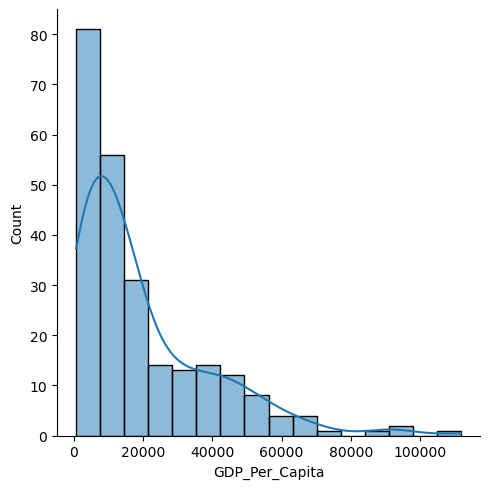

In [35]:
sns.displot( data=gdp_df_2020["GDP_Per_Capita"], kde=True )

C:\Users\Jeremy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

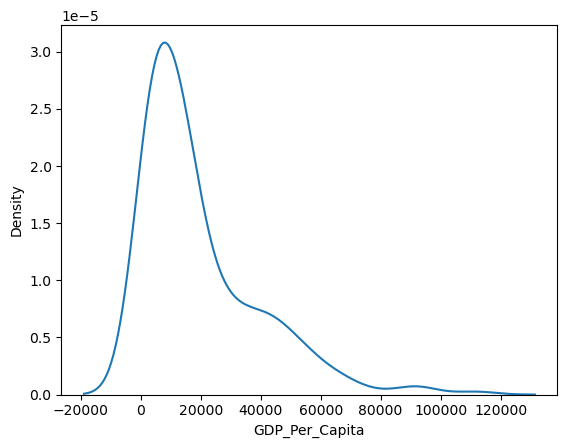

In [36]:
sns.kdeplot(gdp_df_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

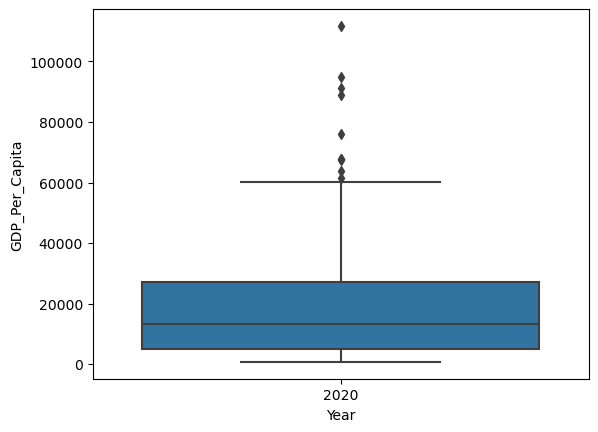

In [37]:
sns.boxplot( x=gdp_df_2020["Year"], y=gdp_df_2020["GDP_Per_Capita"] )

## Most countries are between 0 and 20,000. The barplot helps show the the number of countries.

## 9. What was the median GDP per capita value in 2020?

In [38]:
gdp_df_2020.describe()

,Year,GDP_Per_Capita
count,242.0,242.000000
mean,2020.0,19586.754446
std,0.0,19640.401631
min,2020.0,711.355263
25%,2020.0,4961.408532
50%,2020.0,13357.997573
75%,2020.0,27064.125293
max,2020.0,111751.314751


In [39]:
gdp_df_2020['GDP_Per_Capita'].median()

13357.997573370474

## Median GDP is 13357.997

## 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [40]:
d_list = [1990, 2000, 2010, 2020]
gdp_decades = gdp_df.loc[gdp_df.Year.isin(d_list)]
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


In [41]:
gdp_decades.reset_index(drop = True)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1968.341002
1,Afghanistan,2010,2026.163818
2,Africa Eastern and Southern,2020,3455.023119
3,Africa Eastern and Southern,2010,3513.315920
4,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
916,Zambia,1990,2290.039226
917,Zimbabwe,2020,1990.319419
918,Zimbabwe,2010,1799.540233
919,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

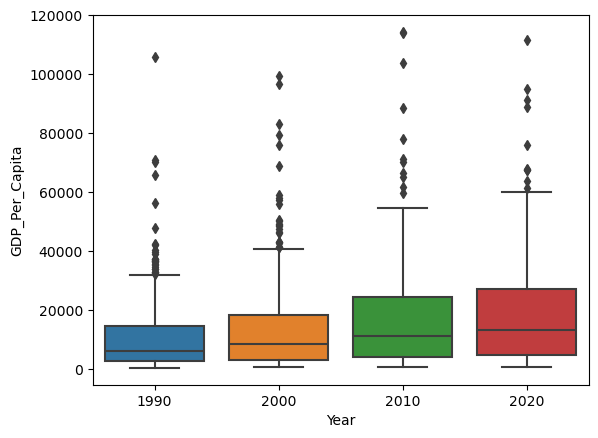

In [42]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )

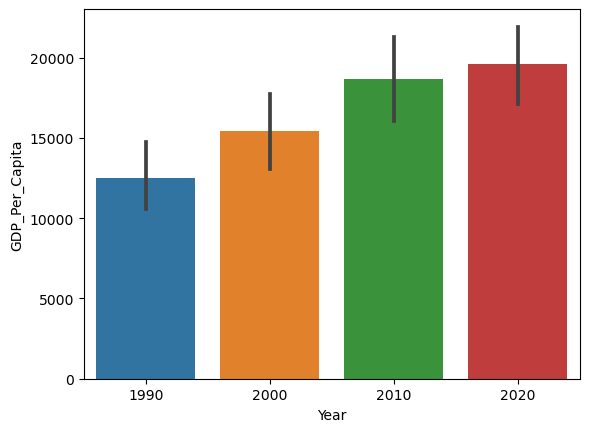

In [43]:
sns.barplot(x = gdp_decades['Year'], y = gdp_decades['GDP_Per_Capita']);

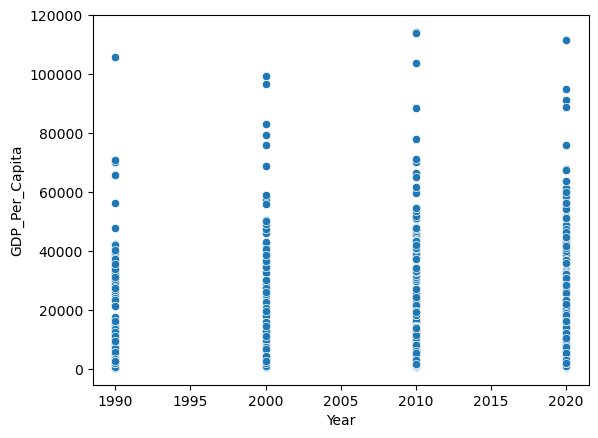

In [44]:
sns.scatterplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita']);

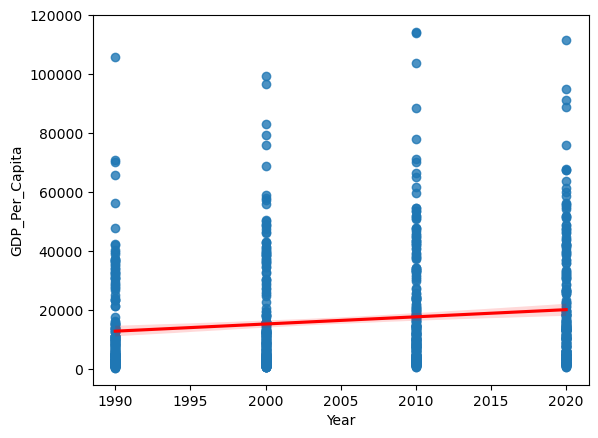

In [45]:
sns.regplot(
    x=gdp_decades['Year'],
    y=gdp_decades['GDP_Per_Capita'],
    line_kws={"color": "r"}
)
plt.show()

## The GDP appears to gradually grow with each decade. The box plot helps show the median.The other charts show the outliers easier.

## 11. Which country was the first to have a GDP per capita greater than $100,000?

In [47]:
gdp_df.loc[gdp_df['GDP_Per_Capita']> 100000]


,Country,Year,GDP_Per_Capita
3277,Ireland,2022,113870.785550
3278,Ireland,2021,102785.490239
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563


## The United Arab Emirates was the 1st country to have over 100K GDP in 1990

## 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [48]:
gdp_2020 = gdp_df.loc[gdp_df['Year'] == 2020]
gdp_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [51]:
gdp_2020.sort_values('GDP_Per_Capita', ascending = False) 

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


In [159]:
gdp_lux = gdp_df.loc[gdp_df['Country'] == 'Luxembourg']
gdp_lux

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


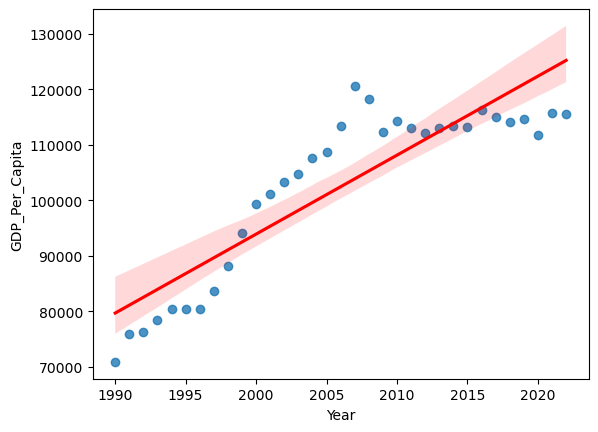

In [53]:
sns.regplot(
    x=gdp_lux['Year'],
    y=gdp_lux['GDP_Per_Capita'],
    line_kws={"color": "r"}
)
plt.show()

<Axes: xlabel='Year'>

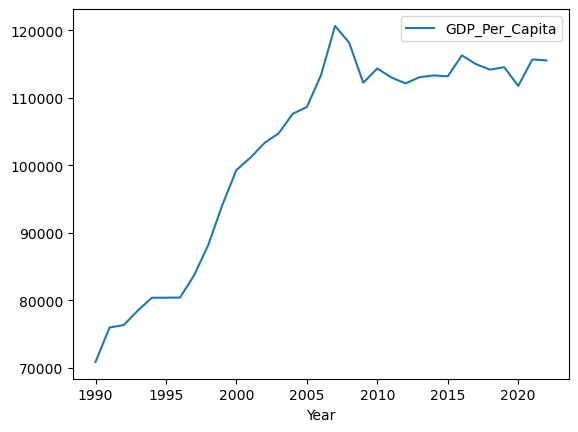

In [54]:
gdp_lux.plot(x='Year', y= 'GDP_Per_Capita')

## Luxembourg has the highest GDP in 2020. Luxembourg's GDP had substantial growth from 1990 to 2010 and then stays in a more stable pace since.

## 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

In [166]:
gdp_2020.sort_values('GDP_Per_Capita', ascending = False) 

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


In [55]:
gdp_bur = gdp_df.loc[gdp_df['Country'] == 'Burundi']

<Axes: xlabel='Year'>

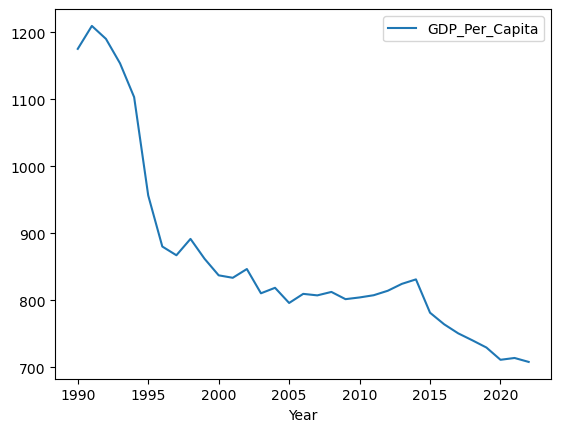

In [56]:
gdp_bur.plot(x='Year', y= 'GDP_Per_Capita')

## Burundi had the lowest GDP in 2020

## 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [57]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows = 6083)

In [58]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


## 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [59]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [60]:
internet_df

,Country or Area,Year,Value
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [61]:
internet_df = internet_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'Internet_Users_Pct'})
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


## 16. Look at the number of observations in this dataset per year. What do you notice?

In [62]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             6083 non-null   object 
 1   Year                6083 non-null   int64  
 2   Internet_Users_Pct  6083 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 142.7+ KB


In [63]:
internet_df.value_counts('Year')

Year
1990    226
2007    217
2008    214
2011    214
2009    214
2002    214
2001    212
2005    212
2006    212
2004    210
2000    210
2010    209
2012    209
2003    208
1999    207
2016    206
2017    205
2014    204
2013    203
2015    203
1998    195
1997    188
2021    186
2020    186
2019    185
2022    184
1996    177
2018    174
1995    141
1994     92
1993     66
1992     50
1991     39
2023     11
Name: count, dtype: int64

## 2023 only has 11 observations which the most recent year. The largest number of observations was 1990 followerd by the years 2000-2012

## 17. What is the first year to have a non-zero internet users percentage value?

In [64]:
internet_df_0 = internet_df.loc[internet_df['Internet_Users_Pct'] > 0]
internet_df_0

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6077,Zimbabwe,1998,0.081648
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684


In [65]:
internet_df_0.reset_index()

,index,Country,Year,Internet_Users_Pct
0,0,Afghanistan,2019,17.600000
1,1,Afghanistan,2018,16.800000
2,2,Afghanistan,2017,13.500000
3,3,Afghanistan,2016,11.000000
4,4,Afghanistan,2015,8.260000
...,...,...,...,...
5798,6077,Zimbabwe,1998,0.081648
5799,6078,Zimbabwe,1997,0.033080
5800,6079,Zimbabwe,1996,0.016790
5801,6080,Zimbabwe,1995,0.007684


In [66]:
internet_df_0.sort_values('Year', ascending = True)

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294
306,Australia,1990,0.585095
2034,France,1990,0.052778
339,Austria,1990,0.130369
...,...,...,...
427,Bangladesh,2023,44.502700
677,Bosnia and Herzegovina,2023,83.377200
1656,Ecuador,2023,72.694300
1537,Denmark,2023,98.775600


## 1990 was the first year to have non-zero internet users pct value.

## 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [67]:
list = [2000, 2014]
internet_df_2020_2014 = internet_df.loc[internet_df['Year'].isin(list)]
internet_df_2020_2014

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.000000
28,Albania,2014,54.300000
42,Albania,2000,0.114097
57,Algeria,2014,29.500000
71,Algeria,2000,0.491706
...,...,...,...
6017,Yemen,2000,0.082500
6031,Zambia,2014,6.500000
6045,Zambia,2000,0.191072
6061,Zimbabwe,2014,16.364700


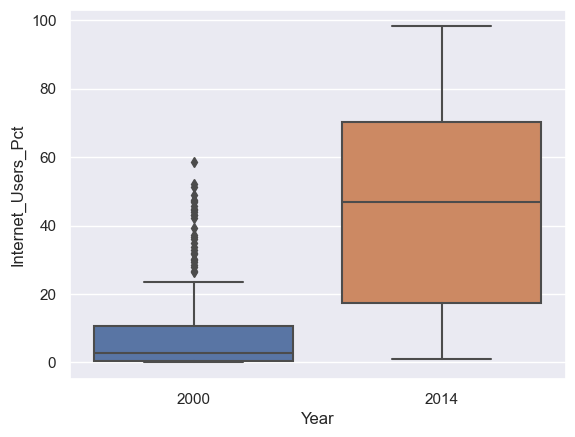

In [68]:
sns.set_theme(style="darkgrid")
sns.boxplot(x=internet_df_2020_2014['Year'], y=internet_df_2020_2014['Internet_Users_Pct'])
plt.show()

## In 2000 the avg internet users pct is below 20 with the outliers being more inline with the average internet users pct in 2014.

## 19. For how many countries was the percentage of internet users below 5% in 2014?

In [182]:
internet_df.loc[internet_df['Year'] == 2014].loc[internet_df['Internet_Users_Pct']<5]

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


## 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [70]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, left_on = ['Country','Year'],right_on = ['Country','Year'], how = 'outer')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,17.600000
3,Afghanistan,2018,2060.698973,16.800000
4,Afghanistan,2017,2096.093111,13.500000
...,...,...,...,...
9107,Yemen,1999,NaN,0.056629
9108,Yemen,1998,NaN,0.023323
9109,Yemen,1997,NaN,0.015025
9110,Yemen,1996,NaN,0.000621


## 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [71]:
gdp_int_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014].sort_values(by = 'Internet_Users_Pct', ascending = False)
gdp_int_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2993,Iceland,2014,50450.741612,98.1580
8131,Falkland (Malvinas) Islands,2014,NaN,97.6000
687,Bermuda,2014,77361.104881,96.8000
5212,Norway,2014,62838.515727,96.3005
1669,Denmark,2014,52048.335493,95.9935
...,...,...,...,...
6949,The Gambia,2014,1885.142034,NaN
7167,Turks and Caicos Islands,2014,24661.145053,NaN
7377,Upper middle income,2014,14063.487284,NaN
7542,West Bank and Gaza,2014,5967.073437,NaN


In [72]:
list_2014 = ['Iceland', 'Falkland (Malvinas) Islands', 'Bermuda']
top_3 = gdp_and_internet_use.loc[gdp_and_internet_use['Country'].isin(list_2014)]
top_3

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
679,Bermuda,2022,81165.650944,NaN
680,Bermuda,2021,78570.489515,NaN
681,Bermuda,2020,76117.804744,NaN
682,Bermuda,2019,81681.726668,NaN
683,Bermuda,2018,81423.408453,NaN
...,...,...,...,...
8341,Iceland,1994,NaN,6.794810
8342,Iceland,1993,NaN,2.667830
8343,Iceland,1992,NaN,1.539160
8344,Iceland,1991,NaN,0.505129


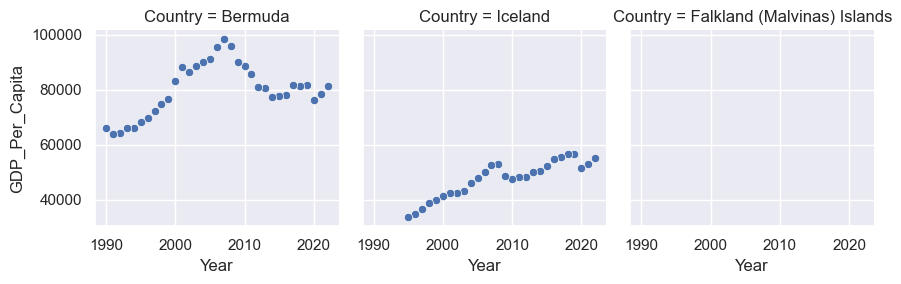

In [73]:
plot = sns.FacetGrid(top_3, col ='Country')
plot.map_dataframe(sns.scatterplot, x = 'Year', y ='GDP_Per_Capita')

## Iceland, Falkland (Malvinas) Islands, and Bermuda have the highest internet use pct in 2014. Falkland had no recorded GDP.

## 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [74]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7,Afghanistan,2014,2144.449634,7.0000
28,Africa Eastern and Southern,2014,3642.875373,NaN
61,Africa Western and Central,2014,4146.994622,NaN
94,Albania,2014,11586.817446,54.3000
127,Algeria,2014,11561.259795,29.5000
...,...,...,...,...
8954,Syrian Arab Republic,2014,NaN,28.0900
8991,Türkiye,2014,NaN,51.0374
9022,Venezuela,2014,NaN,57.0000
9049,Virgin Islands (US),2014,NaN,50.0700


## 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

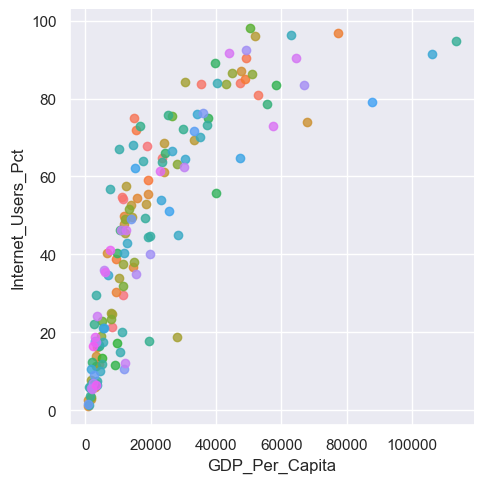

In [75]:
sns.lmplot( x='GDP_Per_Capita', y='Internet_Users_Pct', data=gdp_and_internet_use_2014, fit_reg=False, hue='Country', legend=False)

## Countries with lower GDP tend to have lower internet users pct as well. As the GDP rises so does the internet users pct.